# Grammar of graphics in python: datavisualizatie met Altair

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rrodenburg/KnowledgeSharing/blob/main/DataBaaS/gg_in_python_altair.ipynb)

Python heeft zoveel visualizatie libraries dat je vaak als data scientist door de bomen het bos niet meer ziet. 
Het internet stikt van tutorieals om allelei plots te maken, in allerlei mogelijke packages. 
Al deze packages hebben hun sterke en zwakke punten, afhankelijk van de use-case. 
Deze blog heeft niet als insteek om alle python plog-packages te vergelijken, maar om te illustreren hoe je simpel en intuitief data vanuit dataframes kan visualizeren. 
Een van de belangrijkste aspecten van het werk als Data Scientiest is namelijk om **snel** inzicht te krijgen in data.
Persoonlijk heb ik in verschillende projecten gewerkt met verschillende visualizatie packages (onder andere Bokeh, Plotly, Matplotlib en Seaborn).
Echter was ik niet zo gecharmeerd door deze packages dat ik dit package in een volgend project ook zou gebruiken.
Totdat ik [Altair](https://altair-viz.github.io/) gebruikte in een project, het doel van deze blog is om uit hoe je intuitief visualizaties maakt met Altair. 

Wat Altair zo krachtig maakt is dat de API gebaseerd is op de grammar of graphics. Dit is een manier van het beschrijven van statistische visualizaties en volgt simpel gezegd de volgende stappen:

1. Specificeer de data.
2. Encode data naar visualizatie, bijvoorbeeld het de specifieren van data op de assen.
3. Statistische transformatie, bijvoorbeeld berekenen van gemiddelde.
4. Toevoegen van een geometrisch object, bijvoorbeeld een barchart.
5. Positie aanpassingen, bijvoorbeeld stacken van barchart, zodat de data niet overlapt.

In het voorbeeld hieronder word een visualizatie opgebouwd met deze stappen (stap 5 is niet expliciet, want altair stacked de bars hier automatisch).

In [1]:
import altair as alt
from vega_datasets import data

df = data.barley()
(
    alt
    # 1. Specificeer de data
    .Chart(df)
    # 2. Encode data naar visualizatie
    .encode(
        x='variety',
        # 3. Statistische transformatie
        y='sum(yield)',
        color='site'
    )
    # 4. Toevoegen van geometrisch object
    .mark_bar()
)

alt.Chart(...)

Altair is zeker niet het enige package welk een grammar-of-graphics API gebruikt (raad eens waar GG van het bekendste plot package in R voor staat?).
Daarnaast gebruikt het python zusje van ggplot, [PlotNine](https://plotnine.readthedocs.io/en/stable/index.html), en is Seaborn bezig met het ontwikkelen van een [grammar-of-graphics API](http://seaborn.pydata.org/nextgen/). 
Omdat ik geen ervaring heb met PlotNine en de Seaborn implementatie enkel nog een alpha release is, gaat deze blog niet verder in op deze packages. 

# Visualizaties opbouwen met matplotlib, seaborn en altair.

Om duidelijk te maken waarom een grammar of graphics API zo krachtig is, kunnen we deze vergelijken met de API van het meest bekende python visualizatie library [Matplotlib](https://matplotlib.org/) en een van de meest gebruikte statistische visualtie packages [Seaborn](https://seaborn.pydata.org/).
Matplotlib is een volwassen low-level visualizatie library in python waarin het mogelijk is om alle mogelijke figuren te maken. 
Seaborn is daarintegen een high-level visuazatie library, toegespits op statistische visualizaties.
Matplotlib en Seaborn zijn allbij zeer goede visualizatie libraries, en het is zeker waardevol om deze packages goed te kennen.
In een volgend blog zal dieper in gegaan worden hoe Matplotlib en Seaborn specifiek werken.

Disclaimer: Ik ben geen expert in deze packages, dus zou kunnen dat voorbeelden simpeler en/of eleganter kunnen.

## Tidy dataset

Veel plotlibraries (waaronder Altair en Seaborn) werken het beste als data geformatteerd is als een [Tidy](https://en.wikipedia.org/wiki/Tidy_data) dataframe. Dat wil zeggen iedere rij is een observatie, en de kolommen geven de informatie over deze observatie. In het voorbeeld maken we scatter plots van de breedte en lengte van de kelk van een bloem. Om scatter plots te maken, bevat de data de lengte en breedte als kolommen.

In [2]:
df = data.iris()
df.head(5)

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Matplotlib

Om de API's van van Matplotlib, Seaborn en Altair te vergelijken maken we een visualizatie waar toegevoegde waarde van de grammar-of-graphics goed tot uiting komt, namelijk een kolom met 3 scatterplots van de 3 verschillende species in de iris dataset. 
Daarnaast wil ik de as limieten handmatig configureren.

Matplotlib is een low-level plot library, zonder directe pandas integratie. 
Daarom is is het in matplotlib bewerkelijk om het figuur op te bouwen. 
Er moet namelijk:

1. Een leeg canvas gecreerd worden met de 3 subplots
2. Ieder subplot moet individueel gevuld met de juiste data en opgemaakt worden met aslimiten, aslabels en subplottitels.

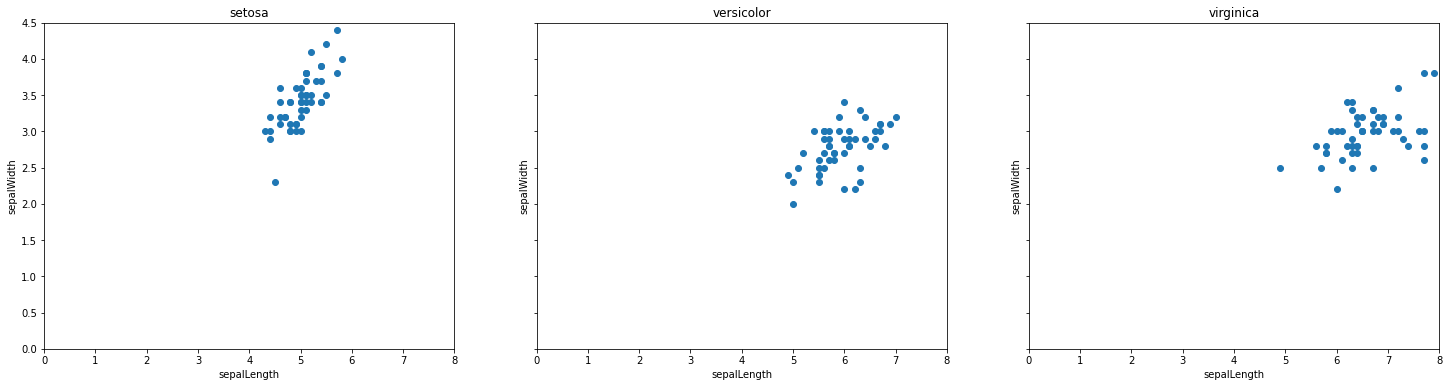

In [3]:
import matplotlib.pyplot as plt

species = df["species"].unique()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 6), sharex=True, sharey=True)
for idx, specie in enumerate(species):
    # Aanmaken van de scatterplot
    _df = df.query("species==@specie")
    axs[idx].scatter(x=_df["sepalLength"], y=_df["sepalWidth"])
    
    # Laten we direct het figuur op maken als we toch loopen
    axs[idx].set_ylim(0,4.5)
    axs[idx].set_xlim(0,8)
    
    axs[idx].set_title(specie)
    axs[idx].set_xlabel("sepalLength")
    axs[idx].set_ylabel("sepalWidth")

## Seaborn

De API van seaborn bevat verschillende high-level functies voor voornamelijk statische weergaves van data. Bijvoorbeeld `sns.scatterplot` en `sns.boxplot`. 
Hierdoor is het met seaborn heel makkelijk om snel standaard statistische grafieken te maken. 
Doordat seaborn goede Pandas integratie heeft, zijn de figuren en assen automatisch gelabeld.

Echter, doordat Seaborn erg high-level is, voeldoet de API vaak net niet aan mijn wensen. 
Om de grid van 3 scatterplots van het voorbeeld te plotten voldoet `sns.scatterplot` niet meer. 
Er wordt aangeraden om `sns.relplot` te gebruiken. 
Deze functie gebruikt `sns.FacetGrid` om het facet te bouwen. 
Ik moet kwargs voor `sns.FacetGrid` meegeven om as-limieten in te stellen.
In mijn ervaring is het ook vaak nodig om het onderliggende matplotlib object aan te passen, zodat de layout wordt zoals ik wil.

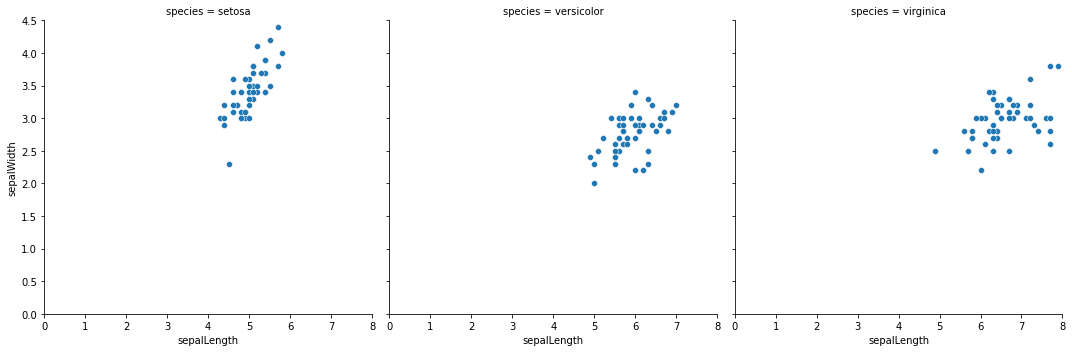

In [4]:
import seaborn as sns

# Let op: ik kan geen sns.scatterplot gebruiken om facet van 3 kolommen te genereren.
# Daarnaast moeten xlim en ylim meegegeven als kwargs sns.Facetplot die gebruikt wordt de facet te creeren.
facet_kws = {
    "sharey":True, 
    "xlim":(0,8), 
    "ylim":(0,4.5)
}
sns.relplot(
    data=df, 
    x=df["sepalLength"], 
    y=df["sepalWidth"], 
    kind="scatter", 
    col="species", 
    facet_kws=facet_kws
);

## Altair

In altair wordt een figuur op een logische manier opgebouwd door het chainen van Altair objecten. Hier zie je dat we 
1. Een Chart object initializeren met de data.
2. We specificeren de data voor de assen, en direct ook dat de `species` kolom gebruikt wordt om het figuur in 3 subplots op te delen
3. Vervolgens specificeren we dat we de data als `points` willen visualizeren, via `mark_point()`.

In [5]:
# Om x en y limiten te defineren verwachten de X als een Scale object.
(
    alt
    .Chart(df)
    .encode(
        x=alt.X("sepalLength", scale=alt.Scale(domain=(0,8))),
        y=alt.Y("sepalWidth", scale=alt.Scale(domain=(0,4.5))), 
        column="species"
    )
    .mark_point()
)

alt.Chart(...)

# Statistische visualizatie met Altair

Om de logica te illusteren, bouwen we het voorbeeld stap voor stap op. In het voorbeeld hieronder zie je dat:

1) We laden de data in een Chart object en visualizeren dit als een punt. De output geeft een overlappend punt weer voor ieder datapunt in ons dataframe.
2) Vervolgens splitsen we de data op de x-as door het toevoegen van een x-ax encoding. Output is een 1-D scatter plot.
3) Door toevoegen van y-as krijgen we een scatter plot.
4) Toevoegen van `column` encoding zorgt ervoor dat data verspreid wordt over 3 species scatter plots.

Voor meer inzichten hoe figuren opgebouwd worden zie de [Altair documentatie](https://altair-viz.github.io/getting_started/starting.html)

In [6]:
# 1. Initializeren van chart object
points = (
    alt
    .Chart(df)
    .mark_point()
)

# 3. Data punten plotten op x-as
x_points = points.encode(x="sepalLength")
# 4. Data punten plotten op y-as
x_y_points = x_points.encode(y="sepalWidth")

# Plots kunnen makkelijk horizontaal naast elkaar worden weergegeven mbv de `|` operator
points | x_points | x_y_points

alt.HConcatChart(...)

In [7]:
# Zoals je waarschijnlijk al kan raden
facet = x_y_points.encode(column="species")
facet

alt.Chart(...)

# Voorbeelden

Om de intuitie van de grammar of graphic en de mogelijkheden van Altair te laten zien die ik regelmatig gebruik. Ten eerste het combineren van verschillende `mark_*` properties. Voor het maken van een grafiek met lijnen en punten, is de opzet:
1) Maak een base chart, met data en encodings
2) Gebruik de base chart om een chart met punten en een met lijnen te maken
3) Overlay de punt en lijn charts via `point + line`

In [8]:
df = data.iowa_electricity()

base = (
    alt
    .Chart(df, title="Energie opwekking in Iowa")
    .encode(
        x="year",
        y="net_generation",
        color="source",
        tooltip="net_generation"
    )
)

point = base.mark_point()
line = base.mark_line()
point_line = point + line

# Test de interactiviteit zelf in google colab met de badge bovenaan het notebook (zoomen, pannen en tooltip!)
point | line | point_line.interactive() 

alt.HConcatChart(...)

Altair heeft ook een grote toolkit voor statistische analyses beschikbaar. In dit voorbeeld worden `mark_*` properties gecombineerd om een gemiddelde met confidence intervals weer te geven met als annotation het aantal datapunten waarop de bootstrap is gebaseerd. De logica volgt weer eenzelfde opzet:

1. Base chart met x-as, y-as en tooltip encodings. De sortering van de X-as zit in de base chart, zodat deze toegepast wordt voor alle figuren.
2. Maken van een figuur met points
3. Maken van een figuur met error bars
4. Maken van een figuur met text annotatie
5. Overlay maken van figuren 2, 3 en 4.

In [9]:
df = data.flights_2k()

base = (
    alt
    .Chart(
        df, 
        title="Vertraging van vluchten vanuit Amerikaanse vliegvelden.",
    )
    .encode(
        x=alt.X(
            "origin",
            sort=alt.EncodingSortField("delay", op="mean"),
            title="Vliegveld"
        ),
        y=alt.Y("mean(delay)", title="Gemiddelde vergraging (min)"),
        tooltip=["origin","mean(delay)","count(delay)"]
    )
)

points = (
    base
    .mark_point(color="black", filled=True)
)


error_bars = (
    base
    # Altair heeft veel ingebouwde aggragatie functies, waaronder bootstrapped 95% confidence intervals
    # https://altair-viz.github.io/user_guide/encoding.html#binning-and-aggregation
    .encode(y="ci0(delay)", y2="ci1(delay)")
    .mark_rule()
)

annotation = (
    base
    .mark_text(
        align='left',
        baseline='middle',
        fontSize=10,
        dx=5,
        dy=-5
    )
    .encode(text='count(delay)')
)

points + error_bars + annotation

alt.LayerChart(...)

# One python plot library to rule them all?
- Javascript backend, specifiek Vega-Lite. Interactief maar toegang tot Vega-Lite nodig om plots te genereren of op te slaan. Jupyter komt met Vega-Lite geinstalleerd, maar andere IDE's wellicht niet. Ook heeft Altair save to png javascript dependencies nodig die los geinstalleerd moeten worden.
- Altair geeft json door aan Vega-Lite, data is dus opgeslagen in notebook. Dus kan heel groot notebook worden (MaxRowsError).
- Altair genereerd en valideert json file. Kan zijn dat json file valide is, maar toch niet het juiste figuur genereerd. Dan zal je in browser console moeten kijken of er een warning is.


# References

- https://cfss.uchicago.edu/notes/grammar-of-graphics/
- https://www.youtube.com/watch?v=FytuB8nFHPQ